# Load the DataSet


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/drive/MyDrive/players_stats.csv'

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
nba_df = pd.read_csv(file_path)

# Remove all categorical variables and remove records with missing numerical measurements

In [8]:
nba_df =nba_df.select_dtypes(include=['float', 'int64', 'string'])

In [9]:
nba_df = nba_df.dropna()

In [10]:
nba_df.head()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
0,26,324,133,51,137,37.2,15,57,26.3,16,...,0,14,15,110,3.29,0.50,29.0,185.0,81.45,23.798393
1,82,1885,954,344,817,42.1,121,313,38.7,145,...,15,157,189,791,1.66,0.34,30.0,180.0,72.45,22.361111
2,47,797,243,93,208,44.7,13,48,27.1,44,...,22,38,83,318,0.87,0.55,20.0,202.5,99.00,24.142661
3,32,740,213,91,220,41.4,1,9,11.1,30,...,9,44,88,244,0.68,0.43,24.0,205.0,106.65,25.377751
4,76,2318,1156,519,965,53.8,11,36,30.6,107,...,98,100,121,1530,2.44,0.68,29.0,205.0,110.25,26.234384


# Conduct principal component analysis 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()


In [13]:
scaled_nba = scaler.fit_transform(nba_df)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

In [16]:
nba_pca = pca.fit_transform(nba_df)

In [17]:
nba_pca

array([[-1.18633138e+03, -3.24850450e+01,  1.08014744e+02, ...,
         1.57944379e-12, -5.59529847e-13, -3.12791222e-13],
       [ 8.80359412e+02, -3.29624785e+02,  1.31470554e+02, ...,
        -4.59649951e-13,  9.87561868e-14, -5.00945284e-13],
       [-6.50109326e+02,  4.99436733e+01, -5.93856866e+01, ...,
         1.78652271e-14,  1.10373560e-12, -5.57193586e-13],
       ...,
       [ 1.67226283e+03,  4.66204444e+02,  7.30321657e+01, ...,
        -6.87955156e-15, -7.27708585e-15, -1.53355218e-14],
       [ 6.29713198e+02,  2.86200581e+02, -1.64464232e+02, ...,
         4.92543089e-14, -1.65465349e-15,  8.46087245e-14],
       [-1.49755686e+03,  2.01651683e+01,  1.24950829e+02, ...,
         8.19876441e-15, -2.35415706e-14,  5.55540888e-14]])

In [18]:
nba_pca.shape

(422, 27)

# Output and visualize the cummulative explained variance 

In [19]:
pca.explained_variance_ratio_.round(2)

array([0.92, 0.03, 0.03, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [20]:
import numpy as np

In [21]:
np.cumsum(pca.explained_variance_ratio_).round(2)

array([0.92, 0.95, 0.98, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  ])

Text(0, 0.5, 'Cumulative Explained Variance')

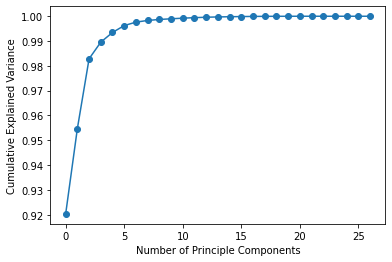

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('Number of Principle Components')
plt.ylabel('Cumulative Explained Variance')

# Partition data to X and y variables, use points as the target variable

In [23]:
X = nba_df.loc[:, nba_df.columns != 'PTS']
Y = nba_df['PTS']
X.shape, Y.shape

((422, 26), (422,))

# Split the data into training\test datasets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


# Build MLR Model



In [26]:
from sklearn import linear_model

In [27]:
linreg = linear_model.LinearRegression()

# Create dataframe of results of predicted, actual, and the residual error and vizualize the residuals

In [28]:
linreg.fit(X_train, Y_train)


LinearRegression()

In [29]:
points_Y_pred = linreg.predict(X_test)

In [30]:
nba_result_df = pd.DataFrame( {'Predicted': points_Y_pred , 'Actual': Y_test, 'Residual': Y_test - points_Y_pred})

In [31]:
nba_result_df.head()

,Predicted,Actual,Residual
167,16.0,16,-1.353584e-12
387,580.0,580,4.547474e-13
207,172.0,172,-9.094947e-13
431,145.0,145,-9.663381e-13
486,778.0,778,3.410605e-13


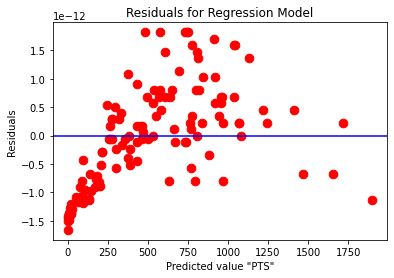

In [32]:
plt.scatter(nba_result_df.Predicted, nba_result_df.Residual, color='red', s=74)
plt.title("Residuals for Regression Model")
plt.xlabel('Predicted value \"PTS\"')
plt.ylabel("Residuals")
plt.axhline(y=0, color='blue', linestyle='-')

In [33]:
from sklearn import metrics

In [34]:
print('R2 :', metrics.r2_score(Y_test, points_Y_pred).round(2))
print('MSE :', metrics.mean_squared_error(Y_test, points_Y_pred).round(2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, points_Y_pred)).round(2))

R2 : 1.0
MSE : 0.0
RMSE : 0.0


# Display average value for each numeric column

In [35]:
nba_df.mean()

Games Played      53.748815
MIN             1246.649289
PTS              515.890995
FGM              193.327014
FGA              430.000000
FG%               43.098104
3PM               41.298578
3PA              117.433649
3P%               25.916588
FTM               87.938389
FTA              116.677725
FT%               70.694313
OREB              55.035545
DREB             167.355450
REB              222.390995
AST              114.317536
STL               39.746445
BLK               24.469194
TOV               70.244076
PF               103.492891
EFF              581.158768
AST/TOV            1.490995
STL/TOV            0.628128
Age               27.507109
Height           197.440758
Weight            99.469194
BMI               25.427747
dtype: float64

# Show correlation between each stat

In [36]:
nba_df.corr()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
Games Played,1.000000,0.871285,0.725876,0.736263,0.739957,0.409323,0.492384,0.510746,0.214118,0.578137,...,0.446802,0.703382,0.860870,0.753495,0.169603,0.002228,0.139838,0.068284,0.080360,0.065185
MIN,0.871285,1.000000,0.921707,0.924815,0.928356,0.339299,0.608798,0.623359,0.284761,0.777914,...,0.493768,0.864992,0.869805,0.923504,0.200303,-0.056421,0.087547,0.009521,0.033385,0.052763
PTS,0.725876,0.921707,1.000000,0.990168,0.988453,0.303771,0.627236,0.633761,0.307045,0.907741,...,0.443631,0.878460,0.750224,0.941144,0.165370,-0.108712,0.063428,-0.016891,0.030831,0.078018
FGM,0.736263,0.924815,0.990168,1.000000,0.986739,0.339387,0.557984,0.564832,0.270643,0.865317,...,0.486511,0.867660,0.772757,0.951121,0.146042,-0.119858,0.065786,0.026565,0.077724,0.105658
FGA,0.739957,0.928356,0.988453,0.986739,1.000000,0.259011,0.635516,0.653092,0.323750,0.861136,...,0.402653,0.879489,0.754016,0.914239,0.195913,-0.107504,0.061307,-0.047915,0.002796,0.067171
FG%,0.409323,0.339299,0.303771,0.339387,0.259011,1.000000,-0.034794,-0.061988,-0.072688,0.264385,...,0.441469,0.262326,0.418209,0.418778,-0.123167,-0.080390,0.089074,0.366599,0.383616,0.216849
3PM,0.492384,0.608798,0.627236,0.557984,0.635516,-0.034794,1.000000,0.988613,0.548396,0.458636,...,-0.069609,0.507518,0.391888,0.454883,0.288291,0.054799,0.074057,-0.301668,-0.304422,-0.153515
3PA,0.510746,0.623359,0.633761,0.564832,0.653092,-0.061988,0.988613,1.000000,0.542164,0.471615,...,-0.077615,0.531583,0.407844,0.454170,0.306489,0.058831,0.060393,-0.324040,-0.326490,-0.164209
3P%,0.214118,0.284761,0.307045,0.270643,0.323750,-0.072688,0.548396,0.542164,1.000000,0.201227,...,-0.205576,0.226864,0.098662,0.167843,0.343684,0.090898,0.013422,-0.355749,-0.425045,-0.306359
FTM,0.578137,0.777914,0.907741,0.865317,0.861136,0.264385,0.458636,0.471615,0.201227,1.000000,...,0.427918,0.828488,0.620178,0.861229,0.111254,-0.123127,0.028665,-0.007247,0.040284,0.082334


# Predict number of points scored by looking at minutes played

In [37]:
x_train, x_test, y_train, y_test = train_test_split(nba_df[['MIN']], nba_df[['PTS']], test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

print(predictions)
print(y_test)

[[ -59.56394301]
 [ 645.39009116]
 [ 117.4018221 ]
 [ 136.31049289]
 [ 837.87066308]
 [ 229.39933372]
 [ -63.44264471]
 [ 616.78466611]
 [ 459.69724722]
 [ 808.29556261]
 [  39.34295037]
 [ -68.29102184]
 [1070.10792743]
 [  60.67580972]
 [ 206.61196123]
 [ -50.83686418]
 [ 651.69298142]
 [1088.0469228 ]
 [ 154.73432597]
 [1169.98449623]
 [ 599.81534617]
 [ 696.29805099]
 [ 849.50676818]
 [ 472.30302775]
 [ 493.63588711]
 [ 513.51423332]
 [ 736.05474342]
 [ 150.85562427]
 [ 685.1467836 ]
 [1057.01730919]
 [ 897.02086402]
 [  30.13103383]
 [ 512.05972019]
 [ 909.14180683]
 [ 627.45109579]
 [  44.67616521]
 [ 923.68693821]
 [1057.98698461]
 [  -4.77728148]
 [ 370.00227038]
 [ 388.91094118]
 [ 927.56563991]
 [ -42.59462307]
 [ 673.51067849]
 [ -49.86718876]
 [ 736.05474342]
 [ -52.29137732]
 [ 159.09786539]
 [ -82.83615322]
 [ 875.20316695]
 [ 615.81499069]
 [ 496.06007567]
 [  72.79675254]
 [ 523.21098758]
 [ 449.51565526]
 [ 294.36758721]
 [ 500.9084528 ]
 [1063.80503716]
 [ 173.1581590

# Display our coefficient of determination

In [39]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.8457382446875945


# Predict number of blocks by looking at rebounds

In [40]:
a_train, a_test, b_train, b_test = train_test_split(nba_df[['BLK']], nba_df[['REB']], test_size=0.2, random_state=42)

In [41]:
lr = LinearRegression()
lr.fit(a_train, b_train)
predictions = lr.predict(a_test)

print(predictions)
print(b_test)

[[115.30372254]
 [211.76464813]
 [120.12676882]
 [134.59590766]
 [153.88809278]
 [163.53418534]
 [105.65762998]
 [163.53418534]
 [211.76464813]
 [231.05683325]
 [124.9498151 ]
 [105.65762998]
 [192.47246301]
 [105.65762998]
 [134.59590766]
 [110.48067626]
 [612.07748934]
 [308.22557373]
 [115.30372254]
 [192.47246301]
 [274.46424977]
 [173.1802779 ]
 [708.53841494]
 [308.22557373]
 [187.64941674]
 [221.41074069]
 [163.53418534]
 [182.82637046]
 [202.11855557]
 [163.53418534]
 [153.88809278]
 [134.59590766]
 [192.47246301]
 [462.56305468]
 [202.11855557]
 [163.53418534]
 [211.76464813]
 [274.46424977]
 [129.77286138]
 [356.45603652]
 [419.15563816]
 [197.29550929]
 [105.65762998]
 [173.1802779 ]
 [105.65762998]
 [467.38610096]
 [105.65762998]
 [197.29550929]
 [110.48067626]
 [390.21736048]
 [187.64941674]
 [110.48067626]
 [105.65762998]
 [134.59590766]
 [235.87987953]
 [163.53418534]
 [269.64120349]
 [153.88809278]
 [206.94160185]
 [206.94160185]
 [853.22980333]
 [173.1802779 ]
 [182.82

# Display our coefficient of determination

In [42]:
lr_confidence = lr.score(a_test, b_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.6555320275445402


# Predict number of steals by looking at assists

In [43]:
c_train, c_test, d_train, d_test = train_test_split(nba_df[['STL']], nba_df[['AST']], test_size=0.2, random_state=42)

In [44]:
lr = LinearRegression()
lr.fit(c_train, d_train)
predictions = lr.predict(c_test)

print(predictions)
print(d_test)

[[  6.90192557]
 [ 83.41315697]
 [ 38.07316799]
 [ 55.07566386]
 [154.25688975]
 [ 69.24441041]
 [  6.90192557]
 [120.25189801]
 [ 46.57441592]
 [171.25938562]
 [ 29.57192006]
 [  6.90192557]
 [188.26188148]
 [ 26.73817074]
 [ 86.24690628]
 [ 18.23692281]
 [ 97.58190352]
 [148.58939113]
 [ 21.07067212]
 [264.77311288]
 [103.24940215]
 [131.58689526]
 [ 52.24191455]
 [ 46.57441592]
 [ 43.74066661]
 [ 86.24690628]
 [117.4181487 ]
 [ 46.57441592]
 [191.09563079]
 [213.76562528]
 [219.43312391]
 [ 26.73817074]
 [131.58689526]
 [137.25439388]
 [140.08814319]
 [ 32.40566937]
 [233.60187046]
 [179.76063355]
 [ 15.4031735 ]
 [ 63.57691179]
 [106.08315146]
 [324.28184842]
 [  9.73567488]
 [137.25439388]
 [  4.06817626]
 [103.24940215]
 [  6.90192557]
 [ 46.57441592]
 [  1.23442694]
 [125.91939664]
 [131.58689526]
 [225.10062253]
 [ 21.07067212]
 [ 91.9144049 ]
 [ 77.74565835]
 [ 89.08065559]
 [ 57.90941317]
 [346.95184291]
 [ 29.57192006]
 [276.10811013]
 [ 86.24690628]
 [222.26687322]
 [ 77.74

# Display our coefficient of determination

In [45]:
lr_confidence = lr.score(c_test, d_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.5772317945331258
